乱数データを入力したときのアクティベーション（活性化関数の後の出力データ）の分布

In [100]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

In [101]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [102]:
def ReLU(x):
    return np.maximum(0, x)

In [103]:
def tanh(x):
    return np.tanh(x)

In [104]:
#1000*100の配列
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

In [105]:
x = input_data

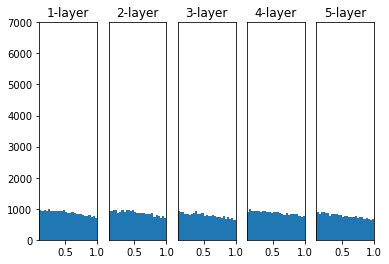

In [106]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)

    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
# iはforを一つずつ上がって、ニューロンの値がaに入る
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    #i=0以外のy軸をなくす
    if i != 0: plt.yticks([], [])
    plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    #https://pythondatascience.plavox.info/matplotlib/%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [107]:
# coding: utf-8
import os
import sys

In [108]:
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [109]:
# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [110]:
# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

In [111]:
# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        #勾配の計算
        grads = networks[key].gradient(x_batch, t_batch)
        #重みの最適化
        optimizer.update(networks[key].params, grads)
        
        #損失関数の計算
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
std=0.01:2.302491309971016
Xavier:2.315505874637675
He:2.369499529982992
===========iteration:100===========
std=0.01:2.302065376308585
Xavier:2.254577051100723
He:1.776846658521059
===========iteration:200===========
std=0.01:2.30041688497185
Xavier:2.13955399960415
He:0.9515563491590562
===========iteration:300===========
std=0.01:2.301915204524576
Xavier:1.8037527360035521
He:0.6400134597045466
===========iteration:400===========
std=0.01:2.300154566464906
Xavier:1.3546702001556454
He:0.4922779727009533
===========iteration:500===========
std=0.01:2.2982229677086785
Xavier:0.8305288400868909
He:0.3425148935940866
===========iteration:600===========
std=0.01:2.3041737101949806
Xavier:0.6746866386019601
He:0.39966640340336335
===========iteration:700===========
std=0.01:2.2990432850208524
Xavier:0.5140350213714564
He:0.298814403255389
===========iteration:800===========
std=0.01:2.3045175104762494
Xavier:0.6309270290375772
He:0.41864284338968016
=====

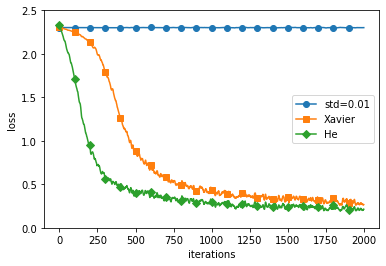

In [112]:
# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()